In [1]:
# imports

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from acquire import acquire_energy_csv
from wrangle import acquire_store

#### Using your store items data:
- Convert date column to datetime format.
- Plot the distribution of sale_amount and item_price.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [2]:
df = acquire_store()
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   store_address  913000 non-null  object 
 6   store_zipcode  913000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 48.8+ MB


In [4]:
# convert date column to datetime format
df.sale_date = pd.to_datetime(df.sale_date, infer_datetime_format=True)

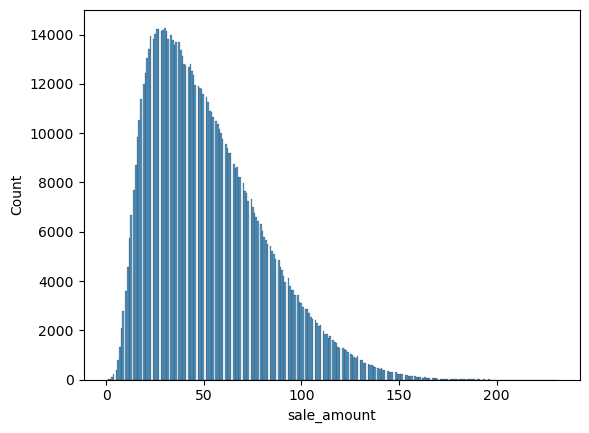

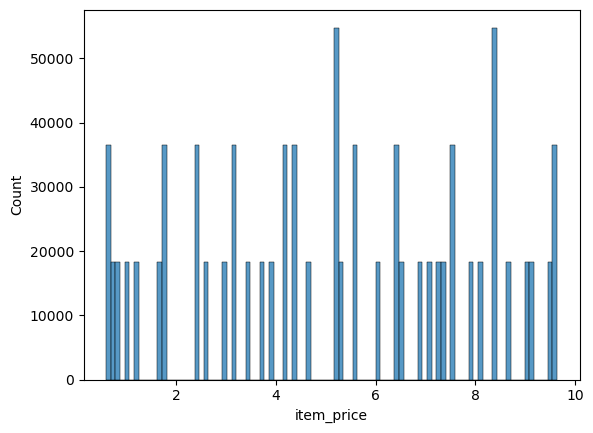

In [5]:
# plot the distribution of sale_amount and item_price
cols = ['sale_amount', 'item_price']
for col in cols:
    sns.histplot(df[col])
    plt.show()

In [6]:
# set the index to be the datetime variable
df = df.set_index('sale_date').sort_index()

# peak into data
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221


In [7]:
# add a 'month' column to a dataframe
df['month'] = df.index.month_name()

In [8]:
# add a 'day of week' column to a dataframe
df['day_of_week'] = df.index.day_name()

In [9]:
# add a 'sales_total' column to a dataframe
df['sales_total'] = df['sale_amount']* df['item_price']

In [10]:
# peak into a data
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday,294.00


In [11]:
def prep_store():
    '''acquires data, makes changes and returns a modified dataframe'''
    
    # acquire data
    df = acquire_store()
    
    # convert date column to datetime format
    df.sale_date = pd.to_datetime(df.sale_date, infer_datetime_format=True)
     
    # plot the distribution of sale_amount and item_price
    cols = ['sale_amount', 'item_price']
    for col in cols:
        sns.histplot(df[col])
        plt.show()
    

    # set the index to be the datetime variable
    df = df.set_index('sale_date').sort_index()
   
    # add columns
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    df['sales_total'] = df['sale_amount']* df['item_price']
    
    # return a dataframe
    return df
  

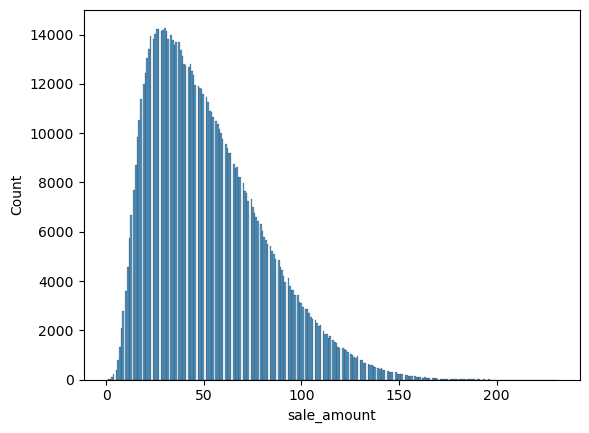

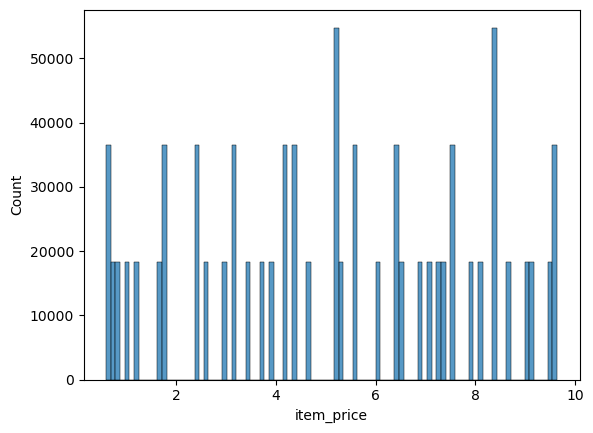

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...
2017-12-31,21,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,735 SW Military Dr,78221,December,Sunday,87.57
2017-12-31,32,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,8503 NW Military Hwy,78231,December,Sunday,133.44
2017-12-31,55,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,12125 Alamo Ranch Pkwy,78253,December,Sunday,285.45


In [12]:
prep_store()

#### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:
- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [13]:
energy_df = acquire_energy_csv()
energy_df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [14]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [15]:
# convert date column to datetime format
energy_df['Date'] = pd.to_datetime(energy_df['Date'], infer_datetime_format=True)

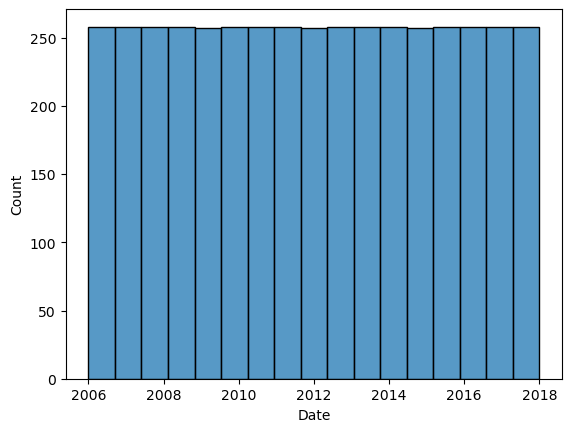

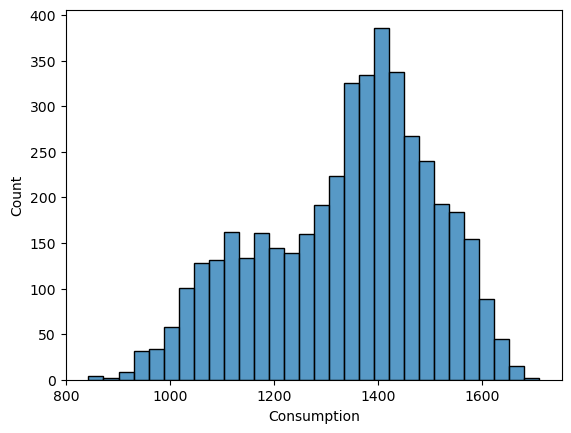

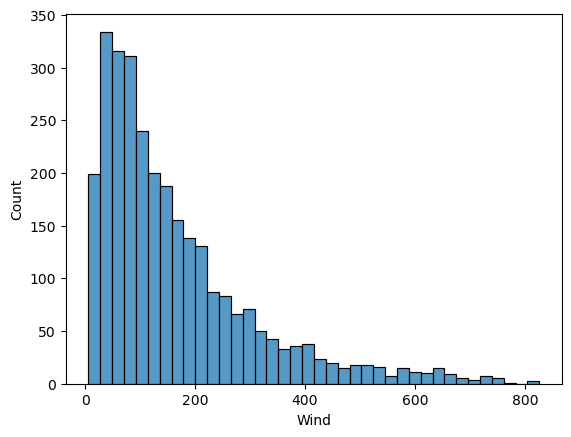

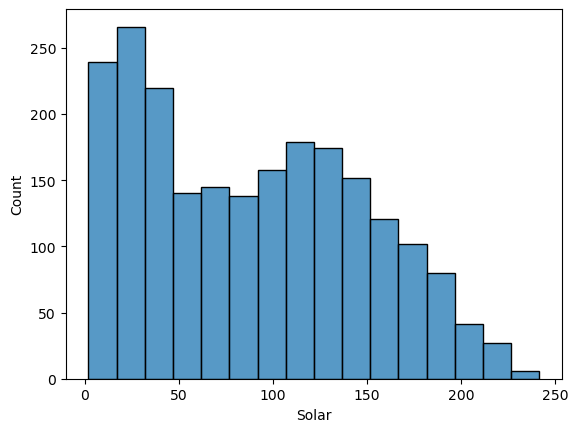

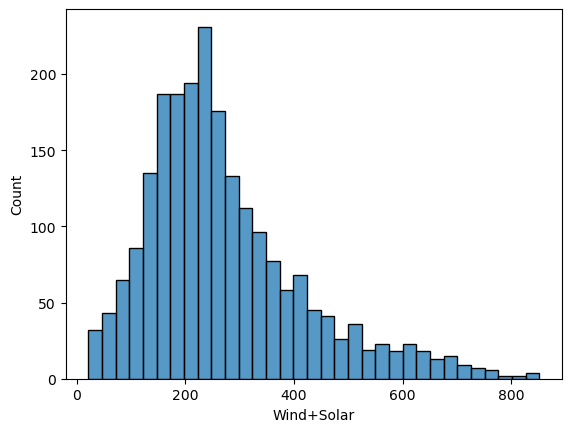

In [16]:
# plot the distribution of each of your variable
for col in energy_df:
    sns.histplot(energy_df[col])
    plt.show()

In [17]:
# set the index to be the datetime variable
energy_df = energy_df.set_index('Date').sort_index()
energy_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [18]:
# add a 'month' column to a dataframe
energy_df['month'] = energy_df.index.month_name()

In [19]:
# add a 'year' column to a dataframe
energy_df['year']= energy_df.index.year

In [20]:
# fill missing values
energy_df= energy_df.fillna(0)

In [21]:
# take a peak into data
energy_df.sample(5)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2017-01-18,1669.395,148.915,22.709,171.624,January,2017
2009-12-10,1489.374,0.000,0.000,0.000,December,2009
2013-06-15,1045.690,174.478,166.466,340.944,June,2013
2007-07-04,1366.085,0.000,0.000,0.000,July,2007
2011-06-09,1399.686,92.081,0.000,0.000,June,2011


In [22]:
def prep_energy():
    
     '''acquires data, makes changes and returns a modified dataframe'''

    # acquire data
    df = acquire_energy_csv()
    
    # convert date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    
    # plot the distribution
    for col in df:
        sns.histplot(df[col])
        plt.show()
        
    # set the index to be the datetime variable    
    df = df.set_index('Date').sort_index()
    
    # add columns
    df['month'] = df.index.month_name()
    df['year']= df.index.year
    
    # fill missing values
    df= df.fillna(0)
    
    # return dataframe
    return df
    

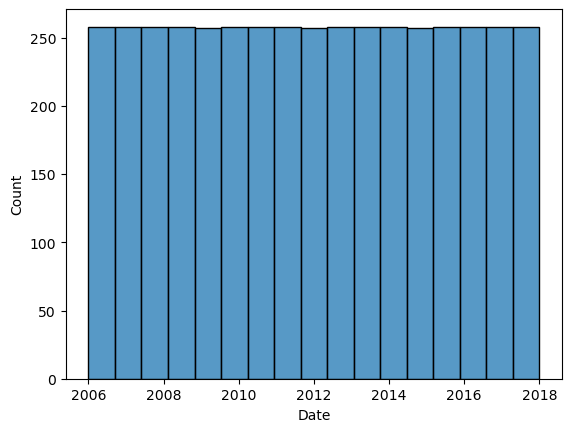

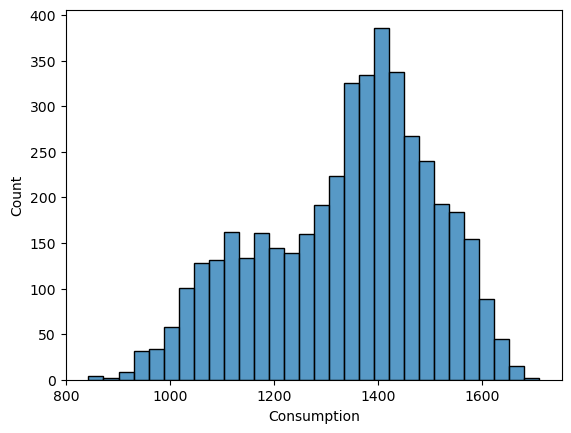

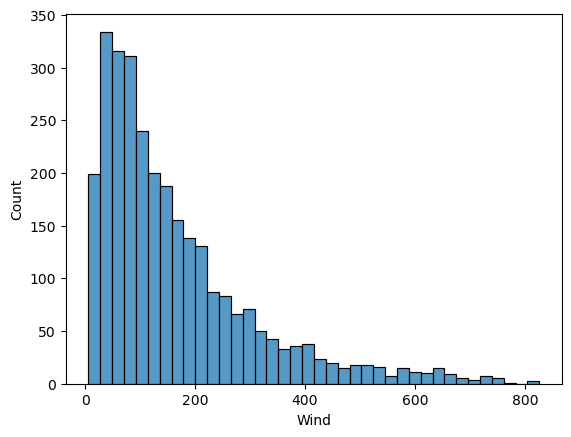

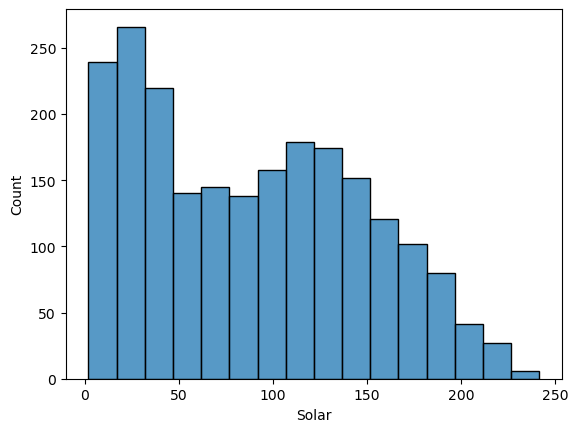

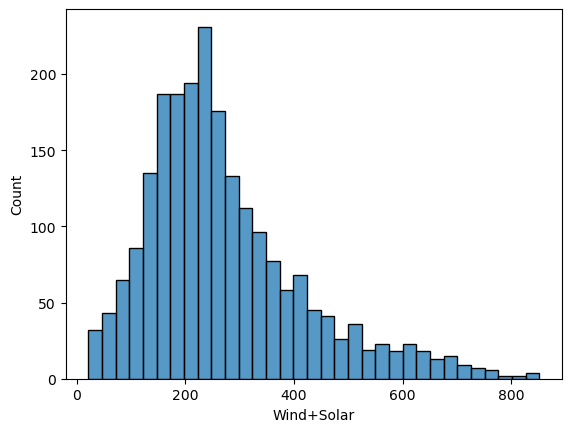

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


In [23]:
prep_energy()